In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../2.1 DATA/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
# Steps 
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
import matplotlib.pyplot as plt

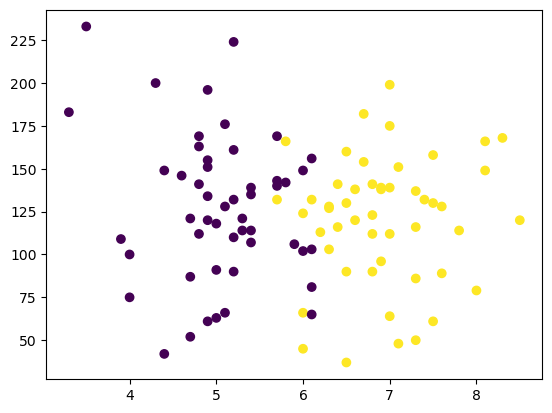

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
x_train

,cgpa,iq
36,5.7,140.0
76,4.9,155.0
58,8.0,79.0
55,7.8,114.0
97,6.7,182.0
...,...,...
43,6.8,141.0
61,7.3,137.0
72,7.3,116.0
21,7.1,151.0


In [15]:
y_train

36    0
76    0
58    1
55    1
97    1
     ..
43    1
61    1
72    1
21    1
24    0
Name: placement, Length: 90, dtype: int64

In [16]:
x_test

,cgpa,iq
69,8.5,120.0
14,6.1,103.0
9,5.1,66.0
66,6.9,96.0
78,6.1,81.0
8,6.1,156.0
92,5.2,110.0
11,6.9,138.0
88,4.4,149.0
18,4.0,100.0


In [17]:
y_test

69    1
14    0
9     0
66    1
78    0
8     0
92    0
11    1
88    0
18    0
Name: placement, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_train

array([[-2.65071757e-01,  3.71863351e-01],
       [-9.77204836e-01,  7.40721193e-01],
       [ 1.78231084e+00, -1.12815854e+00],
       [ 1.60427757e+00, -2.67490243e-01],
       [ 6.25094591e-01,  1.40466531e+00],
       [ 1.87132748e+00,  1.01121694e+00],
       [ 9.09947823e-02, -1.47242586e+00],
       [ 5.36077956e-01, -1.19947106e-01],
       [ 1.97814744e-03, -1.44783534e+00],
       [ 8.92144496e-01,  1.82270420e+00],
       [ 1.42624430e+00,  7.67770768e-02],
       [-2.65071757e-01,  1.08498851e+00],
       [-9.77204836e-01,  1.74893263e+00],
       [ 3.58044687e-01, -2.18309197e-01],
       [-1.51130464e+00,  1.84729472e+00],
       [-1.76055122e-01,  4.21044396e-01],
       [ 8.92144496e-01,  3.47272828e-01],
       [-1.77835455e+00, -1.22652063e+00],
       [ 8.92144496e-01, -3.16671288e-01],
       [-5.32121662e-01,  2.48910737e-01],
       [ 2.69028052e-01,  7.67770768e-02],
       [ 4.47061322e-01,  1.25958122e-01],
       [ 1.15919440e+00, -9.56024882e-01],
       [ 1.

In [22]:
x_test = scaler.fit_transform(x_test)

In [23]:
x_test

array([[ 2.04064679,  0.29368459],
       [ 0.13498442, -0.32269048],
       [-0.65904157, -1.6642127 ],
       [ 0.77020521, -0.57649198],
       [ 0.13498442, -1.12035234],
       [ 0.13498442,  1.59894946],
       [-0.57963897, -0.06888898],
       [ 0.77020521,  0.94631703],
       [-1.21485976,  1.34514796],
       [-1.53247016, -0.43146255]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(x_test)

In [28]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.7


In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

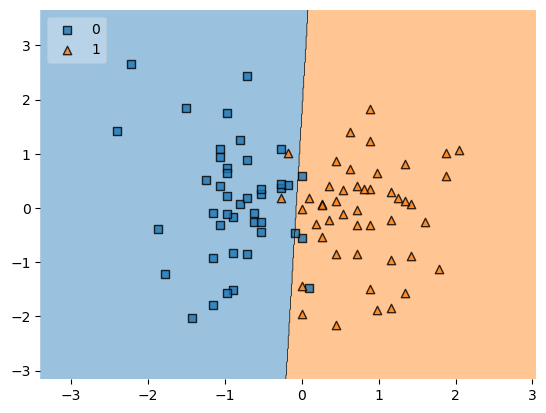

In [32]:
plot_decision_regions(x_train ,y_train.values, clf=clf ,legend=2)

In [33]:
import pickle

In [34]:
pickle.dump(clf,open('model.pkl','wb'))